In [2]:
%pip install pyvista

Defaulting to user installation because normal site-packages is not writeable
INFO: pip is looking at multiple versions of pyvista to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 MB 10.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


/home/a/.local/lib/python3.13/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


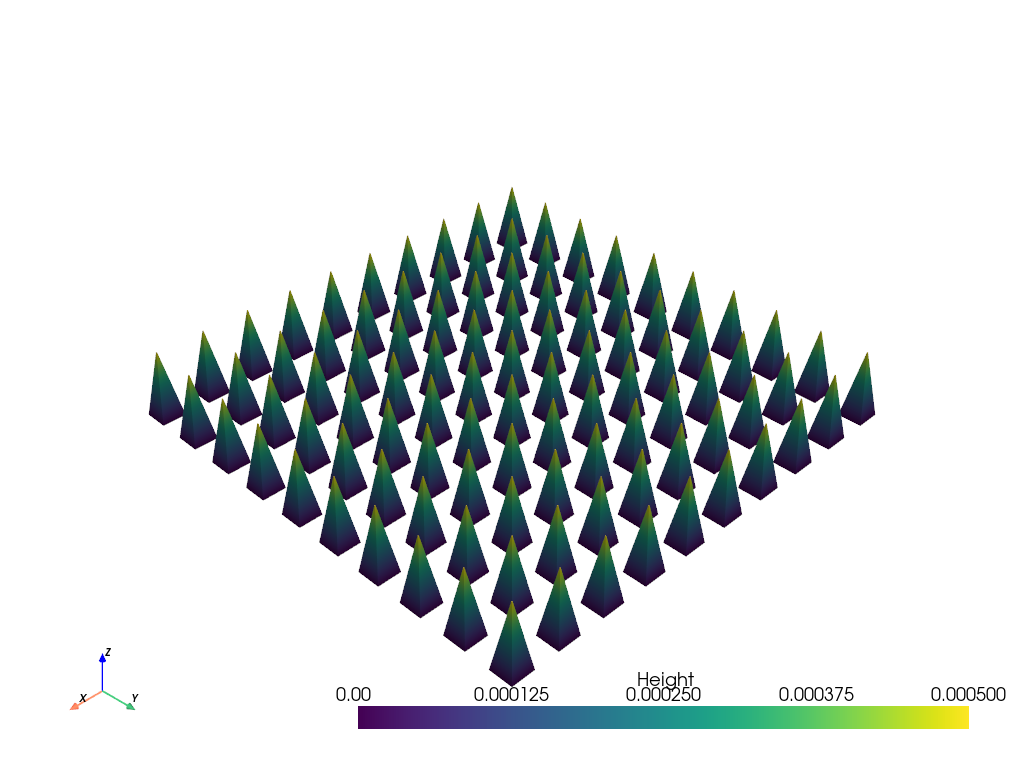

In [3]:
import numpy as np
import pyvista as pv

# Microneedle specifications
height = 500e-6  # 500 microns
base_diameter = 175e-6  # 175 microns
tip_diameter = 5e-6  # 5 microns
tip_thickness = 10e-6  # 10 microns
base_size = 3.6e-3  # 3.6 mm (square base)
rows, cols = 10, 10  # 10x10 microneedles

# Grid dimensions
spacing = base_size / rows
x_positions = np.linspace(spacing / 2, base_size - spacing / 2, rows)
y_positions = np.linspace(spacing / 2, base_size - spacing / 2, cols)

# Create microneedle frustum
def create_microneedle(x, y):
    """Create a single microneedle frustum."""
    points = np.array([
        [0, 0, 0],  # Base centre
        [-base_diameter / 2, -base_diameter / 2, 0],
        [base_diameter / 2, -base_diameter / 2, 0],
        [base_diameter / 2, base_diameter / 2, 0],
        [-base_diameter / 2, base_diameter / 2, 0],
        [-tip_diameter / 2, -tip_diameter / 2, height],
        [tip_diameter / 2, -tip_diameter / 2, height],
        [tip_diameter / 2, tip_diameter / 2, height],
        [-tip_diameter / 2, tip_diameter / 2, height],
    ])
    points[:, :2] += [x, y]
    faces = [
        4, 1, 2, 6, 5,  # Side faces
        4, 2, 3, 7, 6,
        4, 3, 4, 8, 7,
        4, 4, 1, 5, 8,
        4, 1, 2, 3, 4,  # Base face
        4, 5, 6, 7, 8,  # Top face
    ]
    return pv.PolyData(points, faces)

# Create the full microneedle array
grid = pv.MultiBlock()
for i, x in enumerate(x_positions):
    for j, y in enumerate(y_positions):
        grid.append(create_microneedle(x, y))

# Combine all microneedles into a single mesh
combined = grid.combine()

# Colour by height (probability-like layers)
combined["Height"] = combined.points[:, 2]  # Z-coordinates as height
plotter = pv.Plotter()
plotter.add_mesh(combined, scalars="Height", cmap="viridis")
plotter.add_axes()
plotter.show()
